# Today, I'm learning about Image classification using neural networks

### Import the library

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

2022-11-11 05:10:44.815542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Import the image dataset from Keras library

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
# the X (input) dataset is tuple, a two dimensional array to be specific, there are 60000 28 by 28 pixel images
X_train.shape

(60000, 28, 28)

In [5]:
len(y_test)

10000

In [6]:
#the y (output) dataset is a one dimensional array
y_test.shape

(10000,)

In [7]:
#to improve the accuracy of the model, its great to scale the data set. Being that X dataset is multi dimensional, 
#I will scale just that by dividing set by the largest number of pixel point. black=0 and white=255
X_train=X_train/255
X_test=X_test/255

In [8]:
#the shape of the first image is 28 by 28. its the same accross board
X_train[0].shape

(28, 28)

In [9]:
#this is what the first image looks like numerically
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

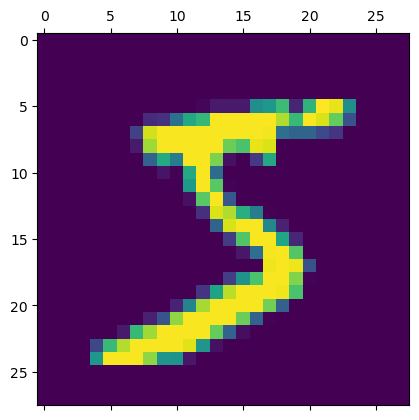

In [10]:
#visualizing that using matplot, it repesents the number 5
plt.matshow(X_train[0]);

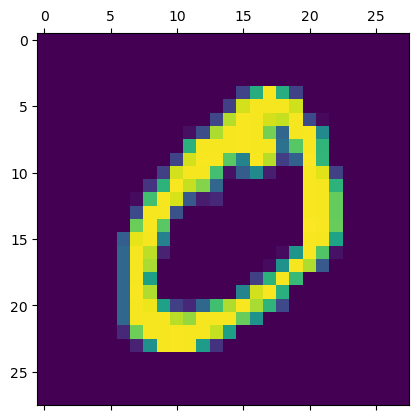

In [11]:
#the second image represents 0
plt.matshow(X_train[1]);

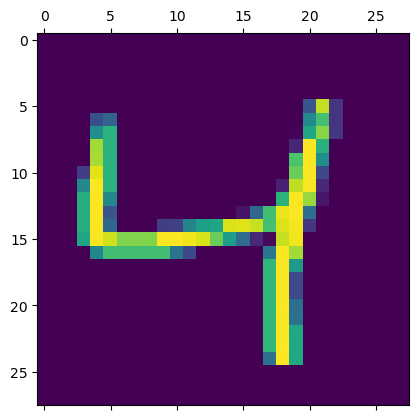

In [12]:
#the third image represents 4
plt.matshow(X_train[2]);

In [13]:
#juxtaposing them against the y_train, they are the exact same thing as expected
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten the images from two dimensional array to one dimention

In [14]:
#irrespective of the dimension of the inpu variables, X, when feeding it to our midel, it must be transformed to a 
#one dimensional  array. To do this, I flattened the X dataset manually. It can be done with a function but that would
#be later on in the code
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X_test_flattened.shape

(10000, 784)

In [18]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

- the reason why I didn't flatten y test and train is because they are already in one dimensional array.

## Create a neural network

In [19]:
#squential indicates hat I want to stack layers
#I can't remember what the dense is for right now
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

2022-11-11 05:12:22.360015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 76s 36ms/step - loss: 0.4676 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.3039 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2663 - accuracy: 0.9262


In [20]:
#to understand how our model performed based on the loss score and accuracy. a good model should 
#result in low loss and high accurracy
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 11s 27ms/step - loss: 0.2706 - accuracy: 0.9236


[0.27059805393218994, 0.9236000180244446]

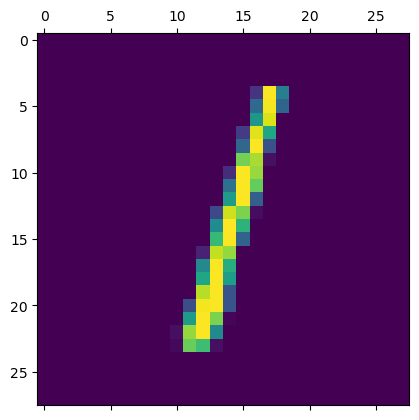

In [21]:
#to check the models accuracy, let's see if it will predict the image accurately
plt.matshow(X_test[2])

In [22]:
#predict 
y_predicted=model.predict(X_test_flattened)
y_predicted[2]

313/313 [==============================] - 15s 44ms/step


array([4.1517802e-04, 9.9225408e-01, 6.2213689e-01, 3.7645692e-01,
       2.8700670e-02, 1.0084533e-01, 1.5916587e-01, 1.4881165e-01,
       4.1079083e-01, 4.3906372e-02], dtype=float32)

In [23]:
#it did
np.argmax(y_predicted[2])

1

In [24]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Confusion Matric is check or validate the accuracy

In [26]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [  10,    9,  913,   21,   13,    2,   13,   10,   37,    4],
       [   4,    0,   14,  939,    1,   16,    2,    9,   16,    9],
       [   1,    1,    4,    1,  933,    0,    9,    3,    7,   23],
       [  10,    2,    2,   47,   13,  756,   18,    7,   31,    6],
       [  12,    3,    5,    1,    8,    9,  917,    2,    1,    0],
       [   1,    5,   22,    7,   10,    0,    0,  943,    2,   38],
       [   8,    8,    6,   34,   11,   23,   10,    9,  854,   11],
       [  11,    7,    1,   12,   44,    5,    0,   19,    6,  904]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Treu_Value')

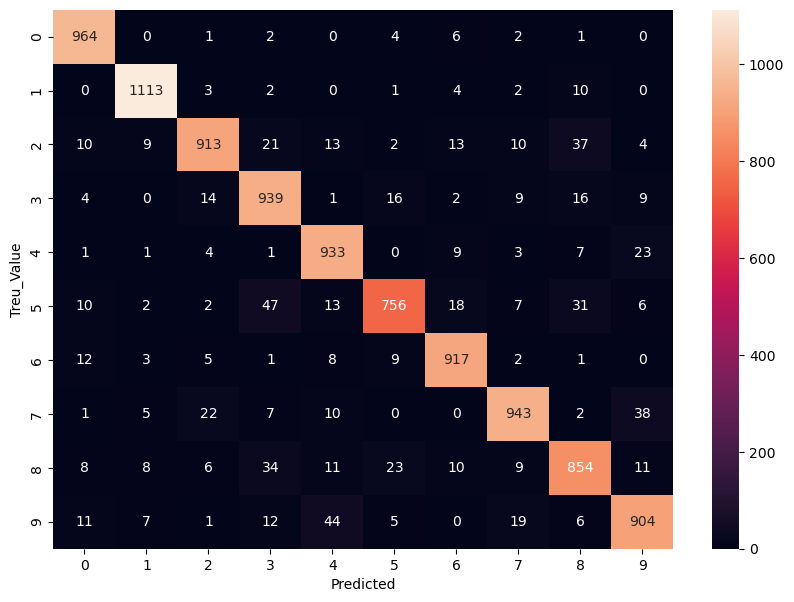

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Treu_Value')

### Introducing hidden layers. 
- to impove the accuracy of the model, we can add hidden layers to the network. As many as we see fit

In [28]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 75s 36ms/step - loss: 0.2660 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1225 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0863 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0523 - accuracy: 0.9838


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 16s 37ms/step - loss: 0.0824 - accuracy: 0.9756


[0.0824185237288475, 0.975600004196167]

313/313 [==============================] - 7s 22ms/step


Text(95.72222222222221, 0.5, 'Treu_Value')

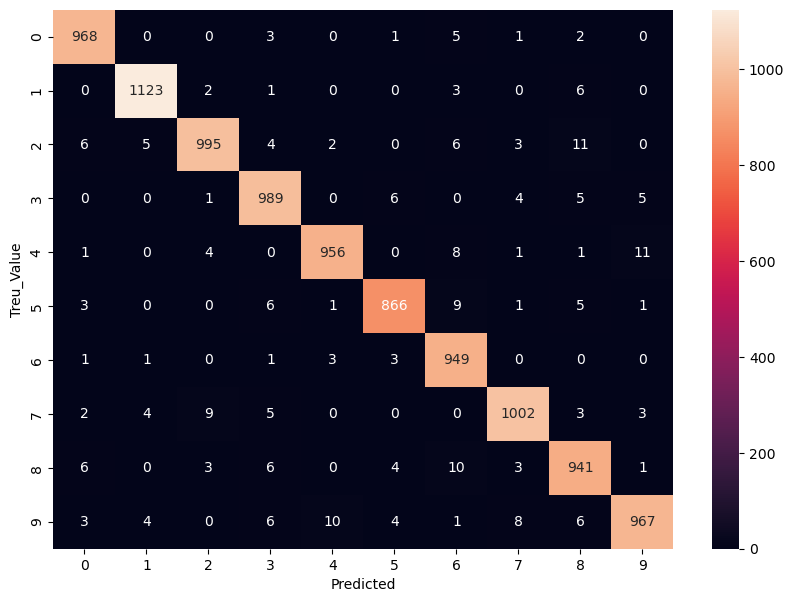

In [30]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Treu_Value')

### Using keras to flatten the X dataset

In [31]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 88s 44ms/step - loss: 0.2703 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.1199 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0838 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0625 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0486 - accuracy: 0.9850


In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 12s 32ms/step - loss: 0.0848 - accuracy: 0.9732


[0.08478032052516937, 0.9732000231742859]

313/313 [==============================] - 10s 29ms/step


Text(95.72222222222221, 0.5, 'Treu_Value')

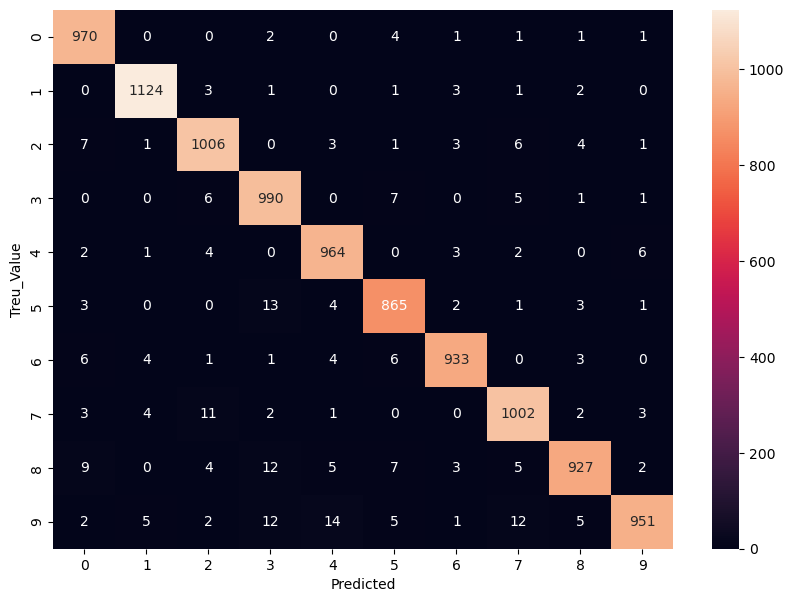

In [33]:
y_predicted=model.predict(X_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Treu_Value')